In [43]:
# Import required libraries
import os
import requests
import json
import pandas as pd
# Import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import numpy as np
import numpy.random as rnd
import requests
from MCForecastTools import MCSimulation
import ipywidgets as widgets
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

In [44]:
# Load the environment variables from the .env file
# Call the load_dotenv function
load_dotenv()

True

In [45]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
            alpaca_api_key,
            alpaca_secret_key,
            api_version = "v2")

In [47]:
# Can allow user defined with IPY Widgets 
# widgets.Dropdown(options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"], description="Select ETF")

ui= widgets.SelectMultiple(
            options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"],
            value=['AGG'],
            description='Select ETFs for analysis',
            readout= True,
            disabled=False
)
display(ui)

SelectMultiple(description='Select ETFs for analysis', index=(0,), options=('AGG', 'SPY', 'XLF', 'QQQ', 'EEM',…

In [48]:
ui= list(ui.value)
print(ui)

['AGG', 'SPY', 'XLF', 'QQQ']


In [49]:
timeframe = "1D"

today = str(datetime.datetime.today()).split()[0]

three_years_ago= str(datetime.datetime.today()- datetime.timedelta(days=1095)).split()[0]

start_date= pd.Timestamp(three_years_ago, tz="America/New_York").isoformat()

end_date= pd.Timestamp(today, tz="America/New_York").isoformat()
                       
limit_rows=1000
# Can allow user defined with IPY Widgets above 
tickers = ui

In [50]:
print("Preparing 3 years of historical data... Please wait")
alpaca_df= alpaca.get_barset(
               tickers,
               timeframe,
               limit= limit_rows,
               start = start_date,
               end = end_date
).df
display(alpaca_df.head())
display(alpaca_df.tail())

Preparing 3 years of historical data... Please wait


AGG                                        QQQ  \
                             open     high     low    close   volume    open   
time                                                                           
2018-08-17 00:00:00-04:00  106.43  106.545  106.38  106.460  1915186  179.33   
2018-08-20 00:00:00-04:00  106.59  106.680  106.53  106.650  2105513  180.28   
2018-08-21 00:00:00-04:00  106.58  106.620  106.51  106.575  2596721  180.26   
2018-08-22 00:00:00-04:00  106.66  106.710  106.57  106.660  1725557  179.96   
2018-08-23 00:00:00-04:00  106.67  106.705  106.62  106.620  1346950  180.77   

                                                                    SPY  \
                               high       low   close    volume    open   
time                                                                      
2018-08-17 00:00:00-04:00  180.3100  178.2679  179.87  26962928  283.83   
2018-08-20 00:00:00-04:00  180.3251  179.0000  179.70  18570203  285.57   
2018-08-21 00:00:00-04:00  181.4400  180.1300  180.34  18476342  286.24   
2018-08-22 00:00:00-04:00  181.2700  179.7500  181.03  14672065  285.88   
2018-08-23 00:00:00-04:00  182.0450  180.5000  180.77  18474662  285.97   

                                                                  XLF          \
                               high      low   close    volume   open    high   
time                                                                            
2018-08-17 00:00:00-04:00  285.5601  283.370  285.02  43630918  28.04  28.210   
2018-08-20 00:00:00-04:00  285.9700  285.060  285.71  27878971  28.17  28.310   
2018-08-21 00:00:00-04:00  287.3100  286.105  286.25  47719238  28.28  28.510   
2018-08-22 00:00:00-04:00  286.7600  285.575  286.20  32602524  28.25  28.376   
2018-08-23 00:00:00-04:00  286.9400  285.430  285.77  35732521  28.26  28.290   

                                                     
                               low  close    volume  
time                                                 
2018-08-17 00:00:00-04:00  28.0300  28.16  36517847  
2018-08-20 00:00:00-04:00  28.1300  28.25  25473384  
2018-08-21 00:00:00-04:00  28.2200  28.36  42877193  
2018-08-22 00:00:00-04:00  28.2300  28.29  24460821  
2018-08-23 00:00:00-04:00  28.1046  28.15  29835433

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-08-10 00:00:00-04:00  115.65  115.6500  115.4350  115.44  6692325   
2021-08-11 00:00:00-04:00  115.46  115.7000  115.3400  115.55  6423130   
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4000  115.54  4248390   
2021-08-13 00:00:00-04:00  115.65  115.9700  115.6401  115.97  4455924   
2021-08-16 00:00:00-04:00  116.14  116.2700  116.0300  116.03  3406963   

                              QQQ                                        SPY  \
                             open    high      low   close    volume    open   
time                                                                           
2021-08-10 00:00:00-04:00  369.26  369.56  365.620  366.85  32409565  442.61   
2021-08-11 00:00:00-04:00  368.14  368.65  364.840  366.23  28647403  443.80   
2021-08-12 00:00:00-04:00  365.68  367.90  364.295  367.59  23566034  443.62   
2021-08-13 00:00:00-04:00  367.88  369.16  367.380  368.82  17361100  445.59   
2021-08-16 00:00:00-04:00  367.67  369.02  363.700  368.97  33063369  444.54   

                                                                 XLF           \
                               high     low   close    volume   open     high   
time                                                                            
2021-08-10 00:00:00-04:00  443.4400  441.88  442.66  39129442  37.93  38.4700   
2021-08-11 00:00:00-04:00  443.8820  442.62  443.74  35841235  38.47  38.8099   
2021-08-12 00:00:00-04:00  445.2572  442.66  445.08  34892086  38.84  38.9200   
2021-08-13 00:00:00-04:00  445.9300  445.07  445.90  32338962  38.90  38.9500   
2021-08-16 00:00:00-04:00  447.1100  442.87  447.02  52706914  38.32  38.5200   

                                                    
                              low  close    volume  
time                                                
2021-08-10 00:00:00-04:00  37.885  38.36  39531632  
2021-08-11 00:00:00-04:00  38.290  38.80  46109872  
2021-08-12 00:00:00-04:00  38.600  38.86  39521426  
2021-08-13 00:00:00-04:00  38.490  38.58  36123004  
2021-08-16 00:00:00-04:00  37.995  38.51  45522776

In [53]:
# Set number of simulations
# Use IPY Widgets to set sims and years
#int_slider = widgets.IntSlider(min=50, max=500, value=25, step=10, description="Simulations?")
#int_slider

In [54]:
#simulations = int_slider.value
#print(simulations)

In [55]:
#int_slider = widgets.IntSlider(min=1, max=10, value=25, step=1, description="Years?")
#int_slider

In [56]:
#years = int_slider.value
#print(years)

SelectMultiple(description='Select ETFs for analysis', index=(0,), options=('AGG', 'SPY', 'XLF', 'QQQ', 'EEM',…

['XLF']


In [51]:
simulations= widgets.Select(
    options=['50','100', '250', '500'],
    value='100',
    description='num of simulations',
    disabled=False
)
display(simulations)

Select(description='num of simulations', index=1, options=('50', '100', '250', '500'), value='100')

In [52]:
simulations=int(simulations.value)
print(simulations)

100


In [53]:
years=widgets.IntSlider(
    value=10,
    min=1,
    max=30,
    step=1,
    description='Years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(years)

IntSlider(value=10, continuous_update=False, description='Years:', max=30, min=1)

In [54]:
years= int(years.value)
print(years)

10


In [55]:
# set number of years and simulations from user inputs
MC_ETF = MCSimulation(
    portfolio_data = alpaca_df,
    num_simulation = simulations,
    num_trading_days = 252 * years
)

In [56]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_ETF.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994771,1.010790,1.006335,1.011647,0.998134,0.996201,1.004099,0.998501,1.006961,1.004533,...,1.018081,0.990948,1.011636,1.008142,1.018157,1.012382,0.996737,0.998424,0.996815,1.006596
2,0.981867,1.026747,1.008242,1.010900,0.994814,0.995630,1.005728,0.991062,1.012762,1.008329,...,1.018374,0.994017,1.011611,1.011930,1.020399,1.013191,0.997854,0.995274,0.995513,1.013266
3,0.980975,1.029832,1.008573,1.013503,0.995158,0.993161,1.003476,0.995882,1.010975,1.003146,...,1.010978,1.004954,1.011382,1.008187,1.019048,1.013873,1.001716,0.990433,1.001872,1.020982
4,0.980152,1.030812,1.020735,1.010019,1.000683,0.994954,0.998016,0.996250,1.012783,1.006385,...,1.010339,0.998217,1.007867,1.009048,1.011619,1.011699,1.002286,0.999620,0.991391,1.021966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.421323,4.168436,6.759785,5.343368,5.309208,4.183847,4.112661,3.699615,3.350505,2.912649,...,5.384415,3.549965,3.421600,3.035942,5.061339,9.386103,4.395007,6.837778,5.924774,2.586052
2517,3.393164,4.228995,6.805361,5.365837,5.267029,4.169444,4.044472,3.738372,3.327378,2.923188,...,5.370383,3.549195,3.376333,3.035458,5.058951,9.377209,4.413268,6.825212,5.931403,2.568701
2518,3.387979,4.206452,6.816844,5.297779,5.237525,4.178262,4.097243,3.702443,3.349020,2.947969,...,5.335737,3.529032,3.328418,3.018170,5.052619,9.270003,4.436035,6.793244,5.886266,2.573839
2519,3.407105,4.209235,6.824441,5.233600,5.220219,4.175321,4.135106,3.679083,3.403222,2.932653,...,5.329514,3.528028,3.325666,3.039475,5.078014,9.274818,4.440795,6.823346,5.839317,2.572088


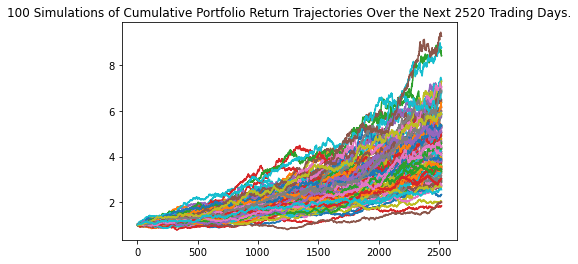

In [57]:
# Plot simulation outcomes
line_plot = MC_ETF.plot_simulation()

In [58]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_ETF.simulated_return.mean(axis=1)),
    "median": list(MC_ETF.simulated_return.median(axis=1)),
    "min": list(MC_ETF.simulated_return.min(axis=1)),
    "max": list(MC_ETF.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001360,1.000596,0.988219,1.020748
2,1.002651,1.003161,0.975633,1.029142
3,1.002432,1.002959,0.959647,1.041430
4,1.003864,1.003086,0.968967,1.052102
...,...,...,...,...
2516,4.600755,4.278199,1.816107,9.386103
2517,4.600292,4.285307,1.823114,9.377209
2518,4.599402,4.298311,1.821150,9.270003
2519,4.600472,4.321580,1.805506,9.274818


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of ETF Portfolio Over the Next Year'}>

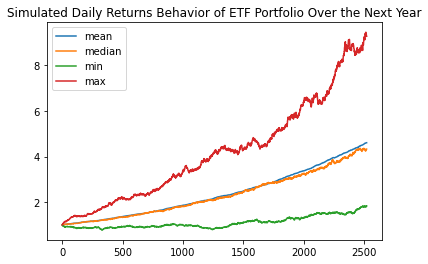

In [59]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of ETF Portfolio Over the Next Year")

In [60]:
# Set initial investment
# Use widget to set investment amount
# widgets.Textarea(value="Please enter text here..")

In [62]:
investment=widgets.IntSlider(
    value=10,
    min=1000,
    max=1000000,
    step=1000,
    description='Investment:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(investment)

IntSlider(value=1000, continuous_update=False, description='Investment:', max=1000000, min=1000, step=1000)

In [63]:
investment = int(investment.value)
print(investment)

405000


In [65]:
# Set initial investment
initial_investment = investment

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
#cumulative_pnl

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of ETF Stock Over the Next Year'}>

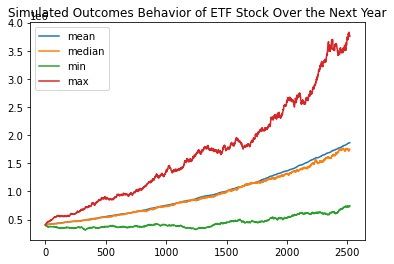

In [66]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of ETF Stock Over the Next Year")

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ETF.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              1.364025
std               0.270459
min               0.849321
25%               1.194443
50%               1.344393
75%               1.479343
max               2.152396
95% CI Lower      0.881132
95% CI Upper      1.955439
Name: 2520, dtype: float64


In [42]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in ETF portfolio
# Bridge back to Widget for initial investment
ci_lower = tbl[8]*10000
ci_upper = tbl[9]*10000

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $120,000.00 in the portfolio over the next year will end within in the range of $8,811.32 and $19,554.39.
